In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
sales_predictions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/02 Week 2: Pandas/sales_predictions.csv')
pd.set_option('display.width',250)
pd.set_option('display.max_columns',15)
pd.set_option('display.min_rows', 50)
print(sales_predictions.shape)
print(sales_predictions.head(2))


(8523, 12)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30          Low Fat         0.016047        Dairy  249.8092            OUT049                       1999      Medium               Tier 1  Supermarket Type1          3735.1380
1           DRC01         5.92          Regular         0.019278  Soft Drinks   48.2692            OUT018                       2009      Medium               Tier 3  Supermarket Type2           443.4228


In [ ]:
#How many rows and columns?
print('Shape: ', sales_predictions.shape)


Shape:  (8523, 12)


In [ ]:
#What are the datatypes of each variable?
print(sales_predictions.dtypes)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [ ]:
#Are there duplicates? If so, drop any duplicates.
sales_predictions.duplicated().sum()


0

In [ ]:
#Identify missing values.
sales_predictions.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Copy dataframe for processing
dfml = sales_predictions

#Find Inconsistent Categories
counter = len(dfml.loc[1,:])  
for x in range(counter):
  if dfml.iloc[:,x].dtypes == 'object':
    print('\n\n', dfml.iloc[:,x].head(0))
    print('Categories: \n', dfml.iloc[:,x].value_counts())



 Series([], Name: Item_Identifier, dtype: object)
Categories: 
 FDW13    10
FDG33    10
FDV38     9
FDX31     9
FDG09     9
NCL31     9
DRE49     9
FDQ40     9
FDD38     9
FDX20     9
NCJ30     9
FDF52     9
NCB18     9
DRN47     9
FDT07     9
FDV60     9
FDP25     9
FDF56     9
FDX04     9
NCF42     9
NCY18     9
FDO19     9
FDU12     9
FDW49     9
FDW26     9
         ..
NCV18     2
FDF38     2
NCW05     2
FDM38     2
DRI59     2
NCC55     2
FDD22     2
FDP15     2
NCS41     2
DRC24     2
NCW30     2
FDH22     2
NCX53     2
NCM42     2
FDW58     2
FDE38     2
FDQ60     1
FDN52     1
FDY43     1
FDC23     1
FDE52     1
DRF48     1
FDO33     1
FDK57     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64


 Series([], Name: Item_Fat_Content, dtype: object)
Categories: 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


 Series([], Name: Item_Type, dtype: object)
Categories: 
 Fruits and Vegetables    123

In [ ]:

# Fix Inconsistent Categories in "Item_Fat_Content", 'LF' should be renamed 'Low Fat' and 'reg' should be renamed 'Regular' and 'low fat' should be renamed to 'Low Fat'

dfml.replace({'Item_Fat_Content':'LF'},'Low Fat', inplace = True)
dfml.replace({'Item_Fat_Content':'low fat'},'Low Fat', inplace = True)
dfml.replace({'Item_Fat_Content':'reg'},'Regular', inplace = True)
print('\n\nCleansed DataFrame: \n',dfml['Item_Fat_Content'].value_counts())




Cleansed DataFrame: 
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [ ]:
#Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

X = dfml.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'])
y = dfml['Item_Outlet_Sales']

#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
#Loading the pipeline with preprocessors
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

In [ ]:
#Pairing the datatype with the pipelines
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#Load the transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple)


In [ ]:
#1) Your first task is to build a linear regression model to predict sales.

#1a) Build a linear regression model
lin_reg = LinearRegression()
pipe = make_pipeline(column_transformer, lin_reg)
pipe.fit(X_train, y_train)

X_test_processed = column_transformer.transform(X_test)   #No data leakage because it only applies pre-processing steps compartmentalized within the test data.
y_pred = lin_reg.predict(X_test_processed)                #Prediction data for sales prediction


In [ ]:
#1b) Evaluate the performance of your model based on r^2.
print(f'Train LinReg R2: {r2_score(y_train, pipe.predict(X_train))}')
print(f'Test LinReg R2: {r2_score(y_test, pipe.predict(X_test))}')


Train LinReg R2: 0.560615819190381
Test LinReg R2: 0.5656202563241928


In [ ]:
#1c) Evaluate the performance of your model based on rmse.
print(f'Train LinReg RMSE: {np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))}')
print(f'Test LinReg RMSE: {np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))}')


Train LinReg RMSE: 1140.3236472053695
Test LinReg RMSE: 1094.7346012092742


In [ ]:
print(X_test_processed.shape)
print(pipe.predict(X_test).shape)
print(y_train.shape, pipe.predict(X_train).shape)


(2131, 31)
(2131,)
(6392,) (6392,)


In [ ]:
#2) Your second task is to build a regression tree model to predict sales.
X_train_processed = column_transformer.transform(X_train)   #preprocess data without using entire pipeline to skip linear regression. X_test_processed already created 3 cells above.

#2a) Build a simple regression tree model.
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)
y_dt_trainpred = dec_tree.predict(X_train_processed)
y_dt_testpred = dec_tree.predict(X_test_processed)

#2b) Compare the performance of your model based on r^2.
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(f'Train Decision Tree R^2: {train_score}')  
print(f'Test Decision Tree R^2: {test_score}')   

#2c) Compare the performance of your model based on rmse.  
print(f'Train Decision Tree RMSE: {np.sqrt(mean_squared_error(y_train, y_dt_trainpred))}')
print(f'Test Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_dt_testpred))}')


Train Decision Tree R^2: 1.0
Test Decision Tree R^2: 0.13650028957220062
Train Decision Tree RMSE: 0.0
Test Decision Tree RMSE: 1543.4947648430564


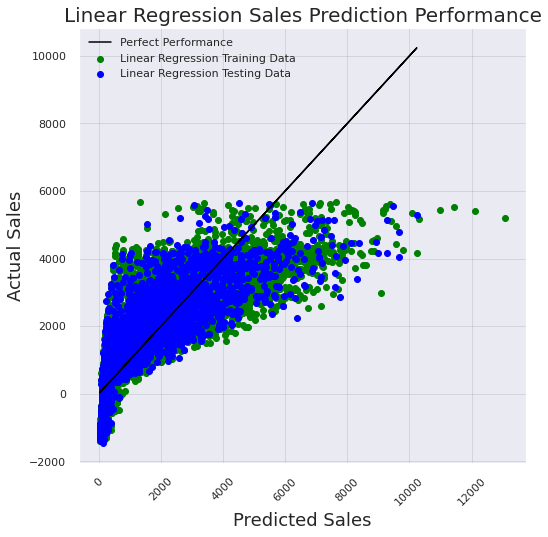

In [ ]:
y_lr_testpred = pipe.predict(X_test)
y_lr_trainpred = pipe.predict(X_train)

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(8, 8)})
plt.scatter(y_train, y_lr_trainpred, label='Linear Regression Training Data', color='green')
plt.scatter(y_test, y_lr_testpred, label='Linear Regression Testing Data', color='blue')

plt.plot(y_test,y_test, color = 'black', label= 'Perfect Performance')
plt.xticks(rotation = 45)
plt.xlabel('Predicted Sales', fontsize = 18);
plt.ylabel('Actual Sales', fontsize = 18);
plt.title('Linear Regression Sales Prediction Performance', fontsize=20)
plt.grid(c = 'k', alpha = .1, linestyle = '-') 
plt.legend(loc='best')


Demonstrates Low Variance.
Testing and training data are highly stacked
Moderate alignment with our line of correlation

Train LinReg R2: 0.560615819190381

Test LinReg R2: 0.5656202563241928

Train LinReg RMSE: 1140.3236472053695

Test LinReg RMSE: 1094.7346012092742

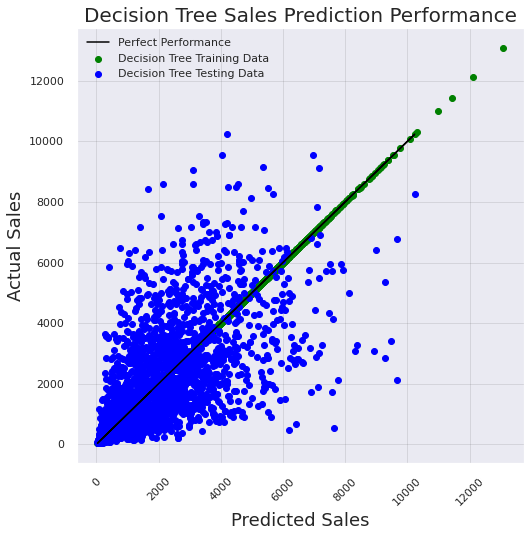

In [ ]:

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(8, 8)})
plt.scatter(y_train, y_dt_trainpred, label='Decision Tree Training Data', color='green')
plt.scatter(y_test, y_dt_testpred, label='Decision Tree Testing Data', color='blue')
plt.plot(y_test,y_test, color = 'black', label= 'Perfect Performance')
plt.xticks(rotation = 45)
plt.xlabel('Predicted Sales', fontsize = 18);
plt.ylabel('Actual Sales', fontsize = 18);
plt.title('Decision Tree Sales Prediction Performance', fontsize=20)
plt.grid(c = 'k', alpha = .1, linestyle = '-') 
plt.legend(loc='best')

Extremely High Variance as demonstrated by the displacement between green and blue dots.
Compared to Linear Regression, the testing data is further dispersed away from our line of correlation.

Train Decision Tree R^2: 1.0

Test Decision Tree R^2: 0.13650028957220062

Train Decision Tree RMSE: 0.0

Test Decision Tree RMSE: 1543.4947648430564

In [ ]:
#3) You now have tried 2 different models on your data set. You need to determine which model to implement.
#3a) Overall, which model do you recommend?
    #Linear regression

#3b) Justify your recommendation.
    #Linear regression is preferred since the variance between Training and Testing data is minimal, indicating there is very low variance between the instances. 
    #Bias can be lower but performs moderately well.
    #In comparison, the Decision Tree model has a very high variance and larger Root Mean Square Error
    

In [ ]:
#4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

#4a) Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.
#4b) Do not include data cleaning, pre-processing, or exploration steps in your presentation.
#4c) Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.
#4d) Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc). 
#4e) Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.
#4f) Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
#4g) Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.

In [ ]:
#Graph of R2 and RMSE of LinReg model
#Graph of R2 and RMSE of Dec Tree Model


Variable Name	Description
Item_Identifier	Unique product ID
Item_Weight	Weight of product
Item_Fat_Content	Whether the product is low fat or regular
Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product
Item_Type	The category to which the product belongs
Item_MRP	Maximum Retail Price (list price) of the product
Outlet_Identifier	Unique store ID
Outlet_Establishment_Year	The year in which store was established
Outlet_Size	The size of the store in terms of ground area covered
Outlet_Location_Type	The type of area in which the store is located
Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.